# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
from env import get_db_url

np.random.seed(123)

# Distributions

## Uniform Distribution

In [2]:
stats.randint(1, 7).rvs(10**5)

array([6, 3, 5, ..., 1, 1, 4])

## Binomial Distribution

In [3]:
stats.binom(30, .25).rvs(10**5)

array([5, 8, 8, ..., 9, 7, 1])

## Normal Distribution

In [4]:
stats.norm(15,3).rvs(10**5)

array([19.06005624, 12.36503305, 10.55142754, ..., 17.15648551,
       11.65792374, 13.12215043])

## Poisson Distribution

In [5]:
stats.poisson(5432/24).rvs(10**5)

array([242, 252, 260, ..., 207, 239, 214])

# Statistics

## PMF - Probability Mass Function 

In [6]:
stats.randint(1, 7).pmf(3)

# discrete distributions

0.16666666666666666

## PDF - Probability Density Function

In [7]:
stats.norm(15,3).pdf(15)

# continuous distributions

0.1329807601338109

## CDF - Cumulative Density Function

In [8]:
stats.randint(1, 7).cdf(3)

0.5

## PPF - Percent Point Function

In [9]:
stats.randint(1, 7).ppf(1/4)

2.0

## SF - Survival Function

In [10]:
stats.randint(1, 7).sf(4)

0.33333333333333337

## ISF - Inverse Survival Function

In [11]:
stats.randint(1, 7).isf(1/3)

4.0

# Exercises

## 1

In [12]:
s = pd.DataFrame(np.random.poisson(2,10**5))
s.head()

,0
0,2
1,3
2,3
3,3
4,1


$ \textrm{Poisson Distribution:} \\$
$$ P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}} $$

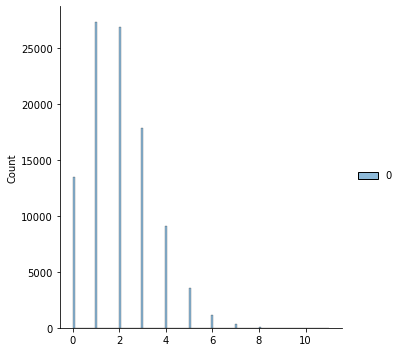

In [13]:
sns.displot(data = s)

Simulation: What is the probability that no cars drive up in the noon hour?

In [14]:
(s==0).mean()

0    0.13509
dtype: float64

Theoretical: What is the probability that no cars drive up in the noon hour?

In [15]:
stats.poisson(2).pmf(0)


0.1353352832366127

Simulation: What is the probability that 3 or more cars come through the drive through?

In [16]:
(s>=3).mean()

0    0.32189
dtype: float64

Theoretical: What is the probability that 3 or more cars come through the drive through?

In [17]:
stats.poisson(2).sf(2)

0.32332358381693654

Simulation: How likely is it that the drive through gets at least 1 car?

In [18]:
(s>=1).mean()

0    0.86491
dtype: float64

Theoretical: How likely is it that the drive through gets at least 1 car?

In [19]:
stats.poisson(2).sf(0)

0.8646647167633873

## 2

In [20]:
grades=pd.DataFrame(np.random.normal(3, 0.3, size=(10**5)))
grades.head(5)

,0
0,3.105106
1,2.999203
2,3.041961
3,3.481415
4,3.043870


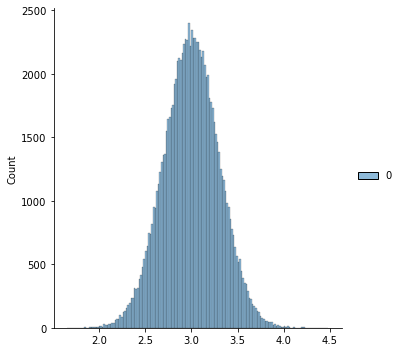

In [21]:
sns.displot(grades)

In [22]:
grades.sort_values(by=0, inplace=True, ignore_index=True)
grades.head()

,0
0,1.652037
1,1.684838
2,1.700613
3,1.747157
4,1.748650


In [23]:
grades.idxmax()

0    99999
dtype: int64

In [24]:
grade_95=int(0.95*grades.idxmax())
grade_95

94999

In [25]:
grades.quantile(0.95)

0    3.492911
Name: 0.95, dtype: float64

Simulation: What grade point average is required to be in the top 5% of the graduating class?

In [26]:
float(grades.values[grade_95].round(4))

3.4929

In [27]:
grade_15=int(0.15*grades.idxmax())
grade_15

14999

Simulation: What GPA constitutes the bottom 15% of the class?

In [28]:
float(grades.values[grade_15].round(4))

2.6899

In [29]:
third_decile=int(0.3*grades.idxmax())
third_decile

29999

In [30]:
second_decile=int(0.2*grades.idxmax())
second_decile

19999

Simulation: Determine the range of the third decile.

In [31]:
grades.quantile([0.2,0.3])

,0
0.2,2.74901
0.3,2.84527


In [32]:
# 3rd decile upper bound

float(grades.values[third_decile].round(4))

2.8453

In [33]:
# 3rd decile lower bound

float(grades.values[second_decile].round(4))

2.749

Simulation: Would a student with a 2.8 grade point average qualify for this scholarship?

In [34]:
# Yes, 2.8 is inside the range of the 3rd-decile.

Simulation: If I have a GPA of 3.5, what percentile am I in?

In [35]:
f"{100*float((grades<=3.5).mean()):.3f}%"

'95.202%'

Theoretical: What grade point average is required to be in the top 5% of the graduating class?

In [36]:
stats.norm(3,0.3).ppf(0.95)

3.4934560880854417

Theoretical: What GPA constitutes the bottom 15% of the class?

In [37]:
stats.norm(3,0.3).ppf(0.15)

2.689069983151863

Theoretical: Determine the range of the third decile.

In [38]:
# 3rd decile lower bound

stats.norm(3,0.3).ppf(0.20)

2.7475136299281258

In [39]:
# 3rd decile upper bound

stats.norm(3,0.3).ppf(0.30)

2.842679846187588

Theoretical: Would a student with a 2.8 grade point average qualify for this scholarship?

In [40]:
# Yes, a 2.8 is within the range of the 3rd decile.

Theoretical: If I have a GPA of 3.5, what percentile am I in?

In [41]:
f"{100*float(stats.norm(3,0.3).cdf(3.5)):.3f}%"

'95.221%'

## 3 

Simulation: How likely is it that this many people or more click through?

In [42]:
(stats.binom(4326,0.02).rvs(10**5)>=97).mean()

0.1393

Theoretical: How likely is it that this many people or more click through?

In [43]:
stats.binom(4326,0.02).sf(96)

0.13975823631416445

## 4

Simulation: What is the probability that at least one of your first 60 answers is correct?

In [44]:
(stats.binom(4326,0.02).rvs(10**5)>=97).mean()

0.13718

Theoretical: What is the probability that at least one of your first 60 answers is correct?

In [45]:
stats.binom(60,1/101).sf(0)

0.44955038406224

## 5

Simulation: How likely is it that the break area gets cleaned up each day?

In [46]:
(stats.binom((int(0.9*3*22)),0.03).rvs(10**5)>0).mean()

0.83269

Theoretical: How likely is it that the break area gets cleaned up each day?

In [47]:
stats.binom((0.9*3*22),0.03).sf(0)

0.8362274861228872

Simulation: How likely is it that it goes two days without getting cleaned up?

In [48]:
1-(stats.binom((int(0.9*3*22*2)),0.03).rvs(10**5)>0).mean()

0.028159999999999963

Theoretical: How likely is it that it goes two days without getting cleaned up?

In [49]:
stats.binom((0.9*3*22*2),0.03).pmf(0)

0.026821436301628983

Simulation: How likely is it that it goes all week without getting cleaned up?

In [50]:
1-(stats.binom((int(0.9*3*22*5)),0.03).rvs(10**5)>0).mean()

7.999999999996898e-05

Theoretical: How likely is it that it goes all week without getting cleaned up?

In [51]:
stats.binom((0.9*3*22*5),0.03).pmf(0)

0.00011781621791055051

## 6

Simulation: What is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?

In [52]:
(stats.norm(15*2,3*2).rvs(10**5)<(33)).mean()

0.69212

Theoretical: What is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?

In [53]:
stats.norm(15*2,3*2).cdf(60-15-10-2)

0.6914624612740131

## 7

In [54]:
salaries=pd.read_sql(
	'''
	SELECT *
	FROM salaries
	WHERE to_date > CURDATE()

	;
	''', 
	get_db_url('employees'))

In [55]:
salaries.salary.describe()

count    240124.000000
mean      72012.235857
std       17309.995380
min       38623.000000
25%       59048.750000
50%       69805.000000
75%       82546.000000
max      158220.000000
Name: salary, dtype: float64

In [56]:
norm_stats=stats.norm(72012.235857,17309.995380)

### 7.a

Predicted: What percent of employees earn less than 60,000?

In [57]:
norm_stats.cdf(6e4)

0.2438574248045388

Observed: What percent of employees earn less than 60,000?

In [58]:
(salaries.salary<6e4).mean()

0.2705727041028802

### 7.b

Predicted: What percent of employees earn more than 95,000?

In [59]:
norm_stats.sf(9.5e4)

0.09208819199191742

Observed: What percent of employees earn more than 95,000?

In [60]:
(salaries.salary>9.5e4).mean()

0.1086272092752078

### 7.c

Predicted: What percent of employees earn between 65,000 and 80,000?

In [61]:
norm_stats.cdf(8e4)-norm_stats.cdf(6.5e4)

0.33506056854908584

Observed: What percent of employees earn between 65,000 and 80,000?

In [62]:
(salaries.salary.between(65_000, 80_000)).mean()

0.32515700221552196

### 7.d

Predicted: What do the top 5% of employees make?

In [63]:
norm_stats.isf(0.05)

100484.64454030624

Observed: What do the top 5% of employees make?

In [64]:
salaries.salary.quantile(0.95)

104225.84999999998